# **Somerville police trust by David Smolinski**
#### (by David Smolinski)
___
<br>

### **Skills this adds to my portfolio:**
- machine learning (classification)
- logistic regression
- train/test split
___
<br>

### **Summary:**
I made a model for predicting trust in the police in Somerville Massachusetts based on results from a survey. It uses the Somerville Happiness Survey Data Set. Accuracy was 0.38. This is 1.9 times more accurate than a prediction one would get from guessing the 1 to 5 police rating.

Features (inputs):
- Happiness: 0 (unhappy) and 1 (happy)
- The following ratings with values of 1 to 5:
    - the availability of information about the city services
    - the cost of housing
    - the overall quality of public schools
    - the maintenance of streets and sidewalks
    - the availability of social community events

Response (prediction, output):
- trust in the local police

___
<br>

### **Links:**
- [my portfolio](https://github.com/DavidSmolinski/portfolio/tree/master/table%20of%20contents)
- [dataset source (UC Irvine Machine Learning Repository)](https://archive.ics.uci.edu/ml/datasets/Somerville+Happiness+Survey)
- [the csv](https://archive.ics.uci.edu/ml/machine-learning-databases/00479/SomervilleHappinessSurvey2015.csv)
___
<br>

note to self: For classifying images, use a colormap (a list of 1 number per pixel) to define features for each image.

In [62]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sn


In [63]:
# # for finding file encoding
# import chardet
# with open(r'SomervilleHappinessSurvey2015.csv', 'rb') as f:
#     result = chardet.detect(f.read())
# result

df = pd.read_csv(r'https://archive.ics.uci.edu/ml/machine-learning-databases/00479/' + 
                 r'SomervilleHappinessSurvey2015.csv', 
                 encoding="'UTF-16'")
df = df.rename(columns={'D':'happy', 'X1':'info_avail', 'X2':'housing_cost', 'X3':'school_quality', 
                        'X4':'trust_police', 'X5':'street_maint', 'X6':'event_avail',})
df.head(1)

,happy,info_avail,housing_cost,school_quality,trust_police,street_maint,event_avail
0,0,3,3,3,4,2,4


In [64]:
features = list(df.columns)
features.remove('trust_police')
x = df[features]
y = df.trust_police

In [65]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=4)

In [66]:
logreg = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=3000)
# logreg = LogisticRegression(solver='liblinear', multi_class='auto')

logreg.fit(X_train, y_train)
logreg_accuracy = accuracy_score(y_test, logreg.predict(X_test))
logreg_accuracy

0.3620689655172414

In [67]:
def knn_accuracy(k_vals):
    scores = ()
    for k in k_vals:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        scores += (accuracy_score(y_test, y_pred),)
    return scores
    
    
knn_accuracy(k_vals=(1,5)) # Check to see if KNN might be better than log. reg.

(0.3793103448275862, 0.3448275862068966)

We can get better accuracy with KNN than logistic regression.

Text(0, 0.5, 'Accuracy')

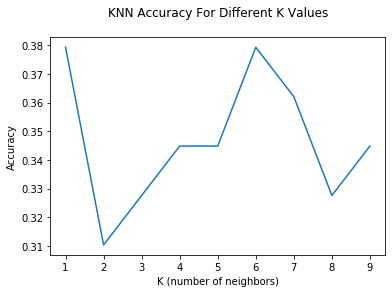

In [68]:
k_vals = tuple(range(1, 10))
plt.plot(k_vals, knn_accuracy(k_vals=k_vals))
plt.title('KNN Accuracy For Different K Values\n')
plt.xlabel('K (number of neighbors)')
plt.ylabel('Accuracy')

In [69]:
# The graph helped me cho0se to use K = 1 neighbor.
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test) # predictions for the test set
cm = confusion_matrix(y_test, y_pred)

Text(33.0, 0.5, 'Actuals (True Values)')

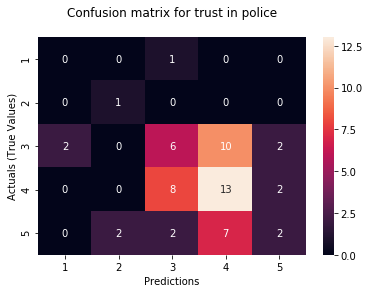

In [70]:
nums = [i for i in range(1,6)]
cm_df = pd.DataFrame(cm, index= nums,
                  columns= nums)
sn.heatmap(cm_df, annot=True)
plt.title('Confusion matrix for trust in police\n')
plt.xlabel('Predictions')
plt.ylabel('Actuals (True Values)')

In [71]:

print(classification_report(y_test, y_pred, labels=nums))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.33      1.00      0.50         1
           3       0.35      0.30      0.32        20
           4       0.43      0.57      0.49        23
           5       0.33      0.15      0.21        13

    accuracy                           0.38        58
   macro avg       0.29      0.40      0.31        58
weighted avg       0.37      0.38      0.36        58



I fit the dataset with the most accurate params.

In [72]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Predicting trust in police based on a made up ratings list in this format:

\[happy, info_avail, housing_cost, school_quality, street_maint, event_avail\]

In [73]:
ratings = [1, 2, 3, 4, 5, 1]
prediction = knn.predict([ratings])
print(f'Rating (1 to 5) for trust in police: {prediction[0]}')

Rating (1 to 5) for trust in police: 5
